## plotting a neuron

/Users/RoozbehFarhoudi/anaconda/lib/python2.7/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)
/Users/RoozbehFarhoudi/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


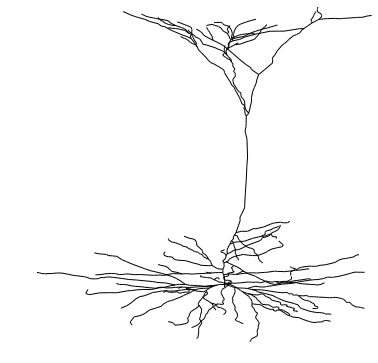

In [1]:
import numpy as np
import McNeuron
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib inline
neuron = McNeuron.visualize.get_all_path("/Volumes/Arch/Projects/Computational Anatomy/pyramidal")
#L_neuron = McNeuron.visualize.get_all_path("/Volumes/Arch/Projects/Computational Anatomy/badea, ganglia cell, retina mouse/")
Feature_neuron = McNeuron.Neuron(file_format = 'swc', input_file=L_neuron[1500])
McNeuron.visualize.plot_2D(Feature_neuron)

In [3]:
from numpy import linalg as LA

def random_subsample(self, n):
    I = np.arange(self.n_soma,self.n_node)
    np.random.shuffle(I)
    selected_index = I[0:n]
    selected_index = np.union1d(np.arange(self.n_soma), selected_index)
    selected_index = selected_index.astype(int)
    selected_index = np.unique(np.sort(selected_index))
    parent_ind = np.array([],dtype = int)
    for i in selected_index:
        p = self.parent_index[i]
        while(~np.any(selected_index == p)):
            p = self.parent_index[p]
        (ind,) = np.where(selected_index==p)
        parent_ind = np.append(parent_ind , ind)
    n_list = []
    for i in range(selected_index.shape[0]):
        n = McNeuron.Node()
        n.xyz = self.nodes_list[selected_index[i]].xyz
        n.r = self.nodes_list[selected_index[i]].r
        n.type = self.nodes_list[selected_index[i]].type
        n_list.append(n)

    for i in np.arange(1,selected_index.shape[0]):
        j = parent_ind[i]
        n_list[i].parent = n_list[j]
        n_list[j].add_child(n_list[i])
    return McNeuron.Neuron(file_format = 'only list of nodes', input_file = n_list)

def mesoscale_subsample(self, number):
    main_point = self.subsample_main_nodes()
    #main_point = random_subsample(self, 300)
    Nodes = main_point.nodes_list
    for remove in range(number):
        pair_list = []
        Dis = np.array([])
        for n in Nodes:
            if n.parent is not None:
                if n.parent.parent is not None:
                    a = n.parent.children
                    if(len(a)==2):
                        n1 = a[0]
                        n2 = a[1]
                        if(len(n1.children) == 0 and len(n2.children) == 0):
                            pair_list.append([n1 , n2])
                            dis = LA.norm(a[0].xyz - a[1].xyz,2)
                            Dis = np.append(Dis,dis)
        (b,) = np.where(Dis == Dis.min())
        b = pair_list[b[0]]
        par = b[0].parent
        loc = b[0].xyz + b[1].xyz
        loc = loc/2
        par.children = []
        par.xyz = loc
        Nodes.remove(b[1])
        Nodes.remove(b[0])
        for i in Nodes:
            i.xyz = i.xyz + 0*np.random.normal(1)
    return McNeuron.Neuron(file_format = 'only list of nodes', input_file = Nodes)

def reducing_data(swc_df, pruning_number=10):
    """
    Parameters
    ----------
    swc_df: dataframe
        the original swc file
    pruning_number: int
        number of nodes remaining at the end of pruning
        
    Returns
    -------
    pruned_df: dataframe
        pruned dataframe
    
    """
    
def seperate(swc_df):
    """
    Parameters
    ----------
    swc_df: dataframe
        the original swc file
    pruning_number: int
        number of nodes remaining at the end of pruning
        
    Returns
    -------
    geometry: array of shape (n-1, 3)
        (x, y, z) coordinates of each shape assuming that soma is at (0, 0, 0)
        
    morphology : array of shape (n-1,)
        index of node - index of parent
    """
    
def geometry_generator(n_nodes=10):
    """
    Generator network: fully connected 2-layer network to generate locations
    
    Parameters
    ----------
    n_nodes: int
        number of nodes
    
    Returns
    -------
    model: keras object
        number of models
    """
    
    model = Sequential()
    
    model.add(Dense(input_dim=100, output_dim=512))
    model.add(Activation('tanh'))

    model.add(Dense(input_dim=512, output_dim=512))
    model.add(Activation('tanh'))

    model.add(Dense(input_dim=512, output_dim=n_nodes * 3))
    model.add(Reshape(n_nodes, 3), input_shape=n_nodes * 3)
    
    return model

def morphology_generator(n_nodes=10):
    """
    Generator network: fully connected 2-layer network to generate locations
    
    Parameters
    ----------
    n_nodes: int
        number of nodes
    
    Returns
    -------
    model: keras object
        number of models
    """
    
    model = Sequential()
    
    # A keras seq to seq model, with the following characteristics:
    # input length: 1
    # input dimensionality: 100
    # some hidden layers for encoding
    # some hidden layers for decoding
    # output length: n_nodes - 1
    # output dimensionality: n_nodes - 1 (there will finally be a softmax on each output node)
        
    return model

132
92


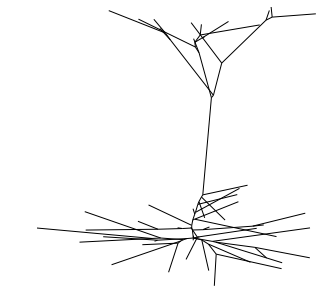

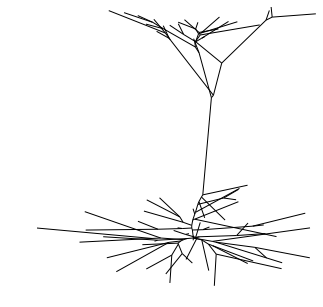

In [4]:
#N = random_subsample(deepcopy(Feature_neuron), 100)
#McNeuron.visualize.plot_2D(N)
a = mesoscale_subsample(deepcopy(Feature_neuron), 20)
McNeuron.visualize.plot_2D(a,size = 4)
McNeuron.visualize.plot_2D(Feature_neuron.subsample_main_nodes(),size = 4)
print Feature_neuron.subsample_main_nodes().n_node
print a.n_node

In [ ]:
McNeuron.visualize.plot_2D(a,size = 3)#,save = "/Volumes/Arch/Dropbox/cosyne 2017 NeuroGan/image_real2_size1.eps")

In [ ]:
a = []
for i in range(15):
    a.append(mesoscale_subsample(deepcopy(Feature_neuron), 30+2*i))

In [ ]:
for i in np.arange(0,15,2):
    McNeuron.visualize.plot_2D(a[i],size = 3,save = "/Volumes/Arch/Dropbox/cosyne 2017 NeuroGan/image"+str(i)+".eps")

In [ ]:
i = 3
b = np.histogram(a[i].distance_from_root,bins = np.arange(0,1200,20))
plt.plot(b[1][1:], b[0], color = 'k')
plt.savefig("/Volumes/Arch/Dropbox/cosyne 2017 NeuroGan/distance_soma"+str(i)+"new.eps")

In [ ]:
b = np.histogram(Feature_neuron.distance_from_root,bins = np.arange(0,1200,20))
f, axs = plt.subplots()
s = 8 + 7*np.random.rand(59)
axs.fill_between(b[1][1:] , y1 = b[0]+s, y2 = b[0]-s, alpha = .1, color = 'r')
axs.plot(b[1][1:], b[0], color = 'r')
plt.savefig("/Volumes/Arch/Dropbox/cosyne 2017 NeuroGan/mean_root.eps")

In [ ]:
b[0].shape